# Representations of "Traid groups" (hardcore 3-interaction orbifold groups)

The 3 stranded Traid group:
$$ \mathcal{T}_3 = \left< t_1, t_2 \mid t_1^2 = t_2^2 = 1\right>$$
The symmetric group on 3 letters:
$$ S_3 = \left< t_1, t_2 \mid t_1^2 = t_2^2 = (t_2 t_1)^3= 1\right>$$
Note that $S_3$ has exactly one more relation and it corresponds exactly to the triple point.

We want to look for a representation of $\mathcal{T}_3$ into $U(8)$. Here I'm thinking that each of the 3 particles comes with a spin which can be either up or down. That attaches a $\mathbb{C}^2$ tensor factor to each of the strands/particles. Hence we are acting on $\mathbb{C}^2\otimes \mathbb{C}^2 \otimes \mathbb{C}^2 \cong \mathbb{C}^8$.

We'll want this to generalize to a higher stranded groups, so I'm thinking that the $t_i$ should correspond to matrices which are "local" in the sense that they only act non-trivially on the $i^{th}$ and $(i+1)^{st}$ $\mathbb{C}^2$ tensor factors. This has the advantage that it will give us the $t_i,t_j$, $|i-j|>1$ commutation relation for free in the higher stranded groups $\mathcal{T}_n$.

I'll also make the assumption that, when restricted to "their" summands, $t_i, t_j$ should act in the _same way_. That seems realistic when we are considering particles of the same type. That means that
$$ \rho(t_1) = M \otimes I_2$$
and $$\rho(t_2) = I_2 \otimes M$$ for some $M \in U(\mathbb{C}^2\otimes\mathbb{C}^2)$. For $n$-particles:
$$ \rho(t_i) = \underbrace{I_2 \otimes \cdots \otimes I_2}_{i-1} \otimes M \otimes \underbrace{I_2 \otimes \cdots \otimes I_2}_{n-i-1}.$$


## What kind of matrices are these: Hermitian Unitary matrices

Any unitary matrix rep. $M$ will have $M M^\dagger=1$. As $t_i^2=1$ for all $i$, we must also have $M^2=1$ so $M=M^\dagger$ by uniqueness of inverses. i.e. $M$ is both unitary and Hermitian.

Two facts:
1. Unitary matrices have a complete set of eigenvectors and eigenvalues which lie in $U(1)$.
2. Hermitian matrices have complete set of eigenvectors and eigenvalues which are real.
So any such matrix has eigenvalues equal to $\pm 1$.

Thus $M$ is of the form $$M = P S P^{-1}$$ where $S$ is a diagonal matrix with non-zero entries equal to $\pm1$ and we can assume $P \in SU(4)$.

If $S=\pm I$ then so is $M$, so we should exclude the cases that there are one or four negative eigenvalues as they are boring. 

## A first try for $M$

There are some obvious choices for $P$'s and $S$'s which give the trivial and symmetric group representations. We could have $M$ be simply the matrix which swaps tensor factors. For reference, that one is
$$ \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{matrix}\right). $$
That is, if $e_1,e_2$ and $f_1,f_2$ are bases for the $\mathbb{C}^2$s, then interchanging the $\mathbb{C}^2$ factors leaves $e_1\otimes f_1$ and $e_2\otimes f_2$ alone and swaps $e_1\otimes f_2$ and $e_2\otimes f_1$.

This corresponds to $P$ equal to
$$ \left(\begin{matrix}
 0 & 1 & 0 & 0 \\
 1 & 0 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{matrix}\right)$$ and $S$ equal to
$$ \left(\begin{matrix}
-1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{matrix}\right).$$

#### Such an $M$ gives a trivial representation to $\gamma=(t_2 t_1)^3$.

In [1]:
import itertools

In [2]:
M = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [3]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"


passed check - this is a representation


In [4]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"

trivial rep on gamma


## So.. what if the center get's one of the other Pauli matrices?

In [11]:
M = identity_matrix(1).block_sum(matrix([[0,i],[-i,0]])).block_sum(identity_matrix(1))

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [12]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"

passed check - this is a representation


In [14]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"

[1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

trivial rep on gamma


### Nope, not that one. Try the other one

In [16]:
M = identity_matrix(1).block_sum(matrix([[1,0],[0,-1]])).block_sum(identity_matrix(1))

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [17]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"

passed check - this is a representation


In [18]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"

In [19]:
gamma

[ 1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0]
[ 0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  1]

In [21]:
t2

[ 1  0  0  0| 0  0  0  0]
[ 0  1  0  0| 0  0  0  0]
[ 0  0 -1  0| 0  0  0  0]
[ 0  0  0  1| 0  0  0  0]
[-----------+-----------]
[ 0  0  0  0| 1  0  0  0]
[ 0  0  0  0| 0  1  0  0]
[ 0  0  0  0| 0  0 -1  0]
[ 0  0  0  0| 0  0  0  1]

## Let's add a twist

If we conjugate the swap matrix by an element of the form $I_2 \otimes H$ or $H \otimes I_2$ for $H\in SU(2)$, then we simply get that action passed forward through that tensor factor. So let's conjugate the swap matrix by something which fiddles around with the mixed states. i.e. the middle two coordinates. 

This corresponds to conjugating the swap matrix by something of the form $I_1 \otimes H \otimes I_1$. Since the swap map is a reflection about the 45 degree diagonal, so this new map will be reflection about some other line.

In [9]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1*t1.conjugate_transpose() == identity_matrix(8)
assert t2*t2.conjugate_transpose() == identity_matrix(8)
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"

passed check - this is a representation


In [10]:
# gamma is the triple-point generator 

gamma = ((t2*t1)^3).simplify_full()

# make it a function
gamma_f = matrix([[element.function(theta) for element in row] for row in gamma])

In [11]:
assert (gamma*gamma.conjugate_transpose()).simplify_full() == identity_matrix(8)
print "passed double check"

passed double check


In [1]:
var('xi_1,xi_2,eta')
assume(xi_1,'real')
assume(xi_2,'real')
assume(eta,'real')

In [2]:
P = matrix([[exp(i*xi_1)*sin(eta),-exp(-i*xi_2)*cos(eta)],[exp(i*xi_2)*cos(eta),exp(-i*xi_1)*sin(eta)]])

pretty_print( P )

[  e^(I*xi_1)*sin(eta) -cos(eta)*e^(-I*xi_2)]
[  cos(eta)*e^(I*xi_2)  e^(-I*xi_1)*sin(eta)]

In [3]:
(P*P.conjugate_transpose()).simplify_full()

[1 0]
[0 1]

In [4]:
H = P*diagonal_matrix([-1,1])*P.conjugate_transpose()
pretty_print(H)

[                  cos(eta)^2 - sin(eta)^2  -2*cos(eta)*e^(I*xi_1 - I*xi_2)*sin(eta)]
[-2*cos(eta)*e^(-I*xi_1 + I*xi_2)*sin(eta)                  -cos(eta)^2 + sin(eta)^2]

In [5]:
t1 = H.block_sum(identity_matrix(1))
t2 = identity_matrix(1).block_sum(H)

pretty_print(t1)
pretty_print(t2)

[                  cos(eta)^2 - sin(eta)^2  -2*cos(eta)*e^(I*xi_1 - I*xi_2)*sin(eta)                                         0]
[-2*cos(eta)*e^(-I*xi_1 + I*xi_2)*sin(eta)                  -cos(eta)^2 + sin(eta)^2                                         0]
[                                        0                                         0                                         1]

[                                        1                                         0                                         0]
[                                        0                   cos(eta)^2 - sin(eta)^2  -2*cos(eta)*e^(I*xi_1 - I*xi_2)*sin(eta)]
[                                        0 -2*cos(eta)*e^(-I*xi_1 + I*xi_2)*sin(eta)                  -cos(eta)^2 + sin(eta)^2]

In [6]:
Q = matrix([[exp(i*xi_1)*sin(eta), exp(i*xi_2)*cos(eta),                    0],
            [                   0, exp(i*xi_1)*sin(eta), exp(i*xi_2)*cos(eta)]])

e3 = Q.right_kernel().basis()[0].conjugate()
#e3 = e3/e3.norm()

pretty_print(e3)

(1, -e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta), e^(-2*I*xi_1 + 2*I*xi_2)*sin(eta)^2/cos(eta)^2)

In [7]:
pretty_print( (e3*e3.conjugate()).simplify_full() )

(cos(eta)^4 - cos(eta)^2 + 1)/cos(eta)^4

In [8]:
e1 = vector([exp(i*xi_1)*sin(eta), exp(i*xi_2)*cos(eta), 0])

Q2 = matrix([e1,e3])

e2 = ( Q2.right_kernel().basis()[0].conjugate() ).simplify_full()

pretty_print( (e2*e2.conjugate()).expand().simplify_full() )

(cos(eta)^4 - cos(eta)^2 + 1)/(cos(eta)^2*sin(eta)^4)

In [9]:
print( (e1*e2.conjugate()).simplify_full() )
print( (e1*e3.conjugate()).simplify_full() )
print( (e2*e3.conjugate()).simplify_full() )

print( (e1*e1.conjugate()).simplify_full() )
print( (e2*e2.conjugate()).simplify_full() )
print( (e3*e3.conjugate()).simplify_full() )

0
0
0
1
(cos(eta)^4 - cos(eta)^2 + 1)/(cos(eta)^2*sin(eta)^4)
(cos(eta)^4 - cos(eta)^2 + 1)/cos(eta)^4


In [10]:
e2 = e2/e2.norm()

In [11]:
Q = matrix([e1,e2*exp(-i*xi_2),e3/e3.norm()*exp(-2*i*(xi_2-xi_1))]).transpose()

pretty_print(Q)

[                                                                                                                                     e^(I*xi_1)*sin(eta)                                         e^(-I*xi_2)/sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)/sin(eta)^2)^2 + 1)                  e^(2*I*xi_1 - 2*I*xi_2)/sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)*sin(eta)^2/cos(eta)^2)^2 + 1)]
[                                                                                                                                     cos(eta)*e^(I*xi_2)                    -e^(-I*xi_1)*sin(eta)/(sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)/sin(eta)^2)^2 + 1)*cos(eta)) -e^(I*xi_1 - I*xi_2)*sin(eta)/(sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)*sin(eta)^2/cos(eta)^2)^2 + 1)*cos(eta))]
[                                                                                                                                                       0                -e^(-2*I*xi_1 + I*xi_2)/(sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)/sin(eta)^2)^2 + 1)*sin(eta)^2)                  sin(eta)^2/(sqrt(abs(e^(-I*xi_1 + I*xi_2)*sin(eta)/cos(eta))^2 + abs(e^(-2*I*xi_1 + 2*I*xi_2)*sin(eta)^2/cos(eta)^2)^2 + 1)*cos(eta)^2)]

The change of basis matrix $Q$ is in $SU(3)$. (or maybe $-1*SU(3)$) That's not obvious, sage can't automatically simplify the determinant. You can, however, simplify that mess by hand to see that you get $\pm1$. A graph is included as a double check.

[1 0 0]
[0 1 0]
[0 0 1]


-(cos(eta)^4 - cos(eta)^2 + 1)/(sqrt((cos(eta)^4 + cos(eta)^2*sin(eta)^2 + sin(eta)^4)/cos(eta)^4)*sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*cos(eta)^3*sin(eta)^2)

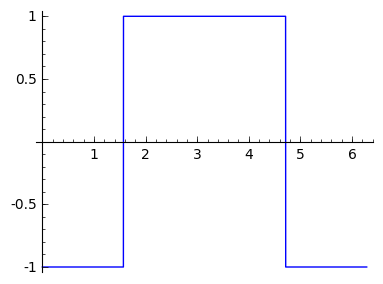

In [12]:
print (Q*Q.conjugate_transpose()).simplify_full()

pretty_print( det(Q).simplify_full() )

plot( det(Q).simplify_full()(eta=x), (x,0,2*pi), figsize=4)

In [13]:
t1_bf = (Q.conjugate_transpose() * t1 * Q).simplify_full()

pretty_print( t1_bf )

t1_b = t1_bf.submatrix(0,0,2,2)

pretty_print( t1_b )

[-1  0  0]
[ 0  1  0]
[ 0  0  1]

[-1  0]
[ 0  1]

In [20]:
t2_bf = (Q.conjugate_transpose() * t2 * Q).simplify_full()

pretty_print( t2_bf )

t2_b = t2_bf.submatrix(0,0,2,2)

pretty_print( t2_b )

pretty_print( det(t2_b).simplify_full() )

[                                                                                                                2*cos(eta)^4 - 2*cos(eta)^2 + 1 2*(cos(eta)^4 - cos(eta)^2 + 1)*e^(-I*xi_1 - I*xi_2)/(sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*sin(eta))                                                                                                                                               0]
[ 2*(cos(eta)^4 - cos(eta)^2 + 1)*e^(I*xi_1 + I*xi_2)/(sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*sin(eta))                                                                                                                -2*cos(eta)^4 + 2*cos(eta)^2 - 1                                                                                                                                               0]
[                                                                                                                                              0                                                                                                                                               0                                                                                                                                               1]

[                                                                                                                2*cos(eta)^4 - 2*cos(eta)^2 + 1 2*(cos(eta)^4 - cos(eta)^2 + 1)*e^(-I*xi_1 - I*xi_2)/(sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*sin(eta))]
[ 2*(cos(eta)^4 - cos(eta)^2 + 1)*e^(I*xi_1 + I*xi_2)/(sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*sin(eta))                                                                                                                -2*cos(eta)^4 + 2*cos(eta)^2 - 1]

-1

2*(cos(eta)^4 - cos(eta)^2 + 1)*e^(-I*xi_1 - I*xi_2)/(sqrt((cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)/(cos(eta)^2*sin(eta)^4))*sin(eta))

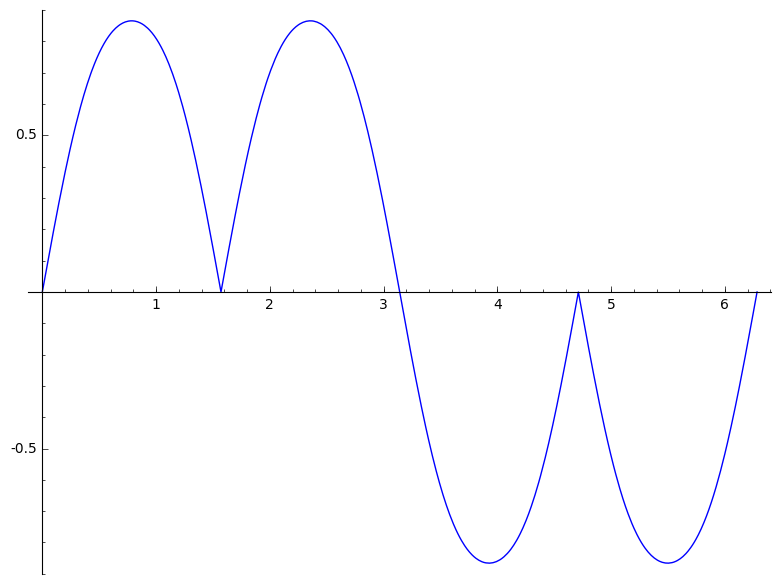

In [96]:
pretty_print( t2_b[0,1] )
plot( t2_b[0,1](xi_1=0,xi_2=0,eta=x), (x,0,2*pi) )

-64*cos(eta)^12 + 192*cos(eta)^10 - 288*cos(eta)^8 + 256*cos(eta)^6 - 132*cos(eta)^4 + 36*cos(eta)^2 - 2

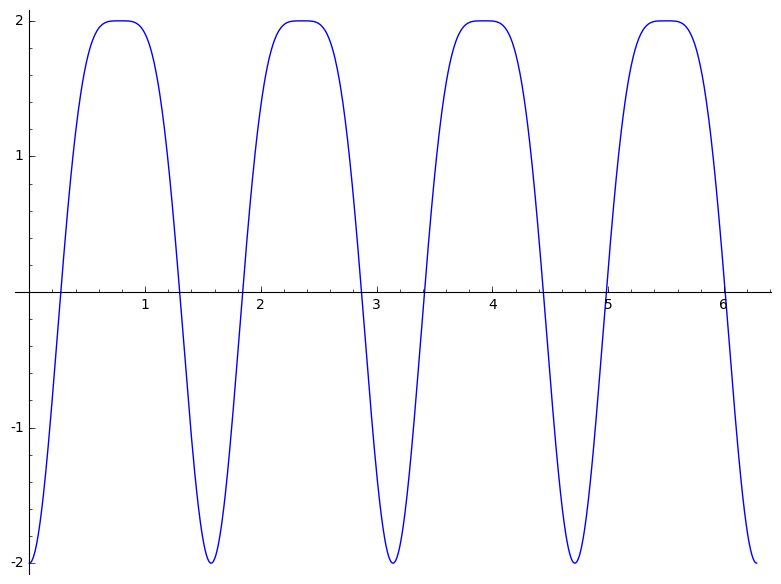

In [100]:
gamma_b = (t2_b*t1_b)^3

trace_gamma = gamma_b.trace().simplify_full()
pretty_print( trace_gamma )

plot( trace_gamma(eta=x), (x,0,2*pi))gamma_b.trace().simplify_full()

In [23]:
var('z')

z

In [24]:
def moebius(mat,variable):
    return (mat[0,0]*variable+mat[0,1])/(mat[1,0]*variable+mat[1,1])

In [92]:
xi_1_p = 0
xi_2_p = pi/5
eta_p = pi/3

mt1 = moebius(t1_b(xi_1=xi_1_p,xi_2=xi_2_p,eta=eta_p),z)
mt2 = moebius(N(t2_b(xi_1=xi_1_p,xi_2=xi_2_p,eta=eta_p)),z)

mgamma = moebius( N(((t2_b*t1_b)^3)(xi_1=xi_1_p,xi_2=xi_2_p,eta=eta_p)), z)

pretty_print(mt1)
pretty_print(mt2)
pretty_print(mgamma)

-z

(0.625000000000000*z + 0.631538688817729 - 0.458839715506824*I)/((0.631538688817729 + 0.458839715506824*I)*z - 0.625000000000000)

(0.898437500000000*z + 0.355240512459973 - 0.258097339972588*I)/(-(0.355240512459973 + 0.258097339972588*I)*z + 0.898437500000000)

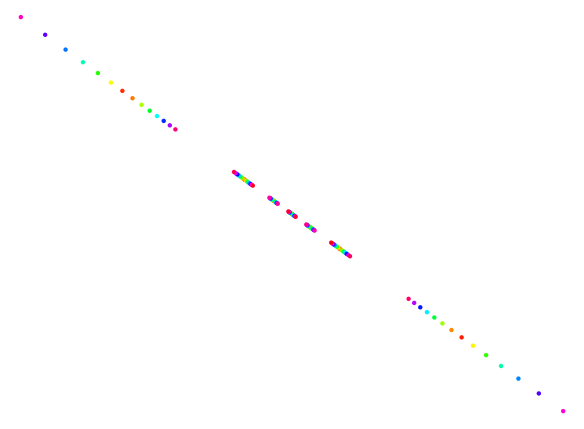

In [93]:
P = Graphics()

iters = 50
rbw = rainbow(2*iters)

z_p = 0+i*0
P += point2d( (z_p.real_part(),z_p.imag_part()), color='black', size=10)

for n in range(iters):
    z_p = mt2(z=z_p)
    P += point2d( (z_p.real_part(),z_p.imag_part()), color=rbw[2*n], size=10)
    z_p = mt1(z=z_p)
    P += point2d( (z_p.real_part(),z_p.imag_part()), color=rbw[2*n+1], size=10)

P.show(aspect_ratio=1,axes=False,figsize=6)

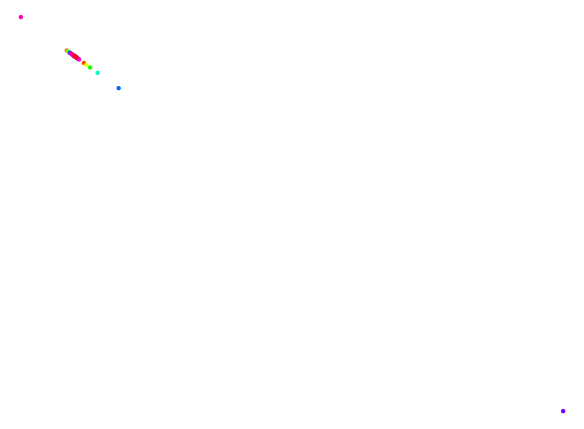

In [94]:
P = Graphics()

iters = 50
rbw = rainbow(2*iters)

z_p = 0+i*0
P += point2d( (z_p.real_part(),z_p.imag_part()), color='black', size=10)

for n in range(iters):
    z_p = mgamma(z=z_p)
    P += point2d( (z_p.real_part(),z_p.imag_part()), color=rbw[2*n], size=10)
    
P.show(aspect_ratio=1,axes=False,figsize=6)

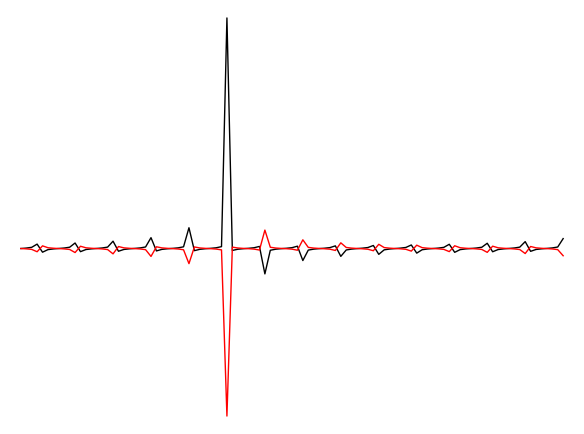

In [95]:
P = Graphics()

iters = 100
rbw = rainbow(2*iters)

z_p = 0+i*0

real_parts = [0]
imag_parts = [0]

for n in range(iters):
    z_p = mgamma(z=z_p)
    real_parts.append(z_p.real_part())
    imag_parts.append(z_p.imag_part())
    
P += list_plot(real_parts,plotjoined=True,color='black')    
P += list_plot(imag_parts,plotjoined=True,color='red')
P.show(axes=False,figsize=6)